In [72]:
import pandas as pd 
import numpy as np 
from  sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = load_breast_cancer()
keys = data.keys()
print("Ключи: {}".format(keys))

Ключи: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [74]:
target = data.target
frame = data.frame
target_names = data.target_names
descr = data.DESCR
feature_names = data.feature_names
filename = data.filename
data_module = data.data_module
datas = data.data

In [75]:
print("Цели :{}".format(target))

Цели :[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 

In [76]:
print("Название целевых классов :{}".format(target_names))

Название целевых классов :['malignant' 'benign']


In [77]:
print("Описание: {}".format(descr))

Описание: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radiu

In [78]:
print("Название признаков: {}".format(feature_names))

Название признаков: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [79]:
print("Форма массива: {}".format(datas.shape))
print("Данные: {}".format(datas))

Форма массива: (569, 30)
Данные: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(datas,target, random_state=0)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (426, 30)
Форма массива X_test: (143, 30)
Форма массива y_train: (426,)
Форма массива y_test: (143,)


In [81]:
df = pd.DataFrame(data=X_train, columns=feature_names)
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,0.2070,1.238,1.234,13.88,0.007595,0.015000,0.014120,0.008578,0.01792,0.001784,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.966,1.959,19.62,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,0.2580,1.166,1.683,22.22,0.003741,0.005274,0.010650,0.005044,0.01344,0.001126,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263


In [82]:
df.columns = df.columns.str.replace(" ","_")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,0.2070,1.2380,1.234,13.88,0.007595,0.015000,0.014120,0.008578,0.01792,0.001784,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,1.959,19.62,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,0.2580,1.1660,1.683,22.22,0.003741,0.005274,0.010650,0.005044,0.01344,0.001126,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.014460,0.014230,0.005297,0.01961,0.001700,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [83]:
df = df.dropna()

In [84]:
print(df.describe())

       mean_radius  mean_texture  ...  worst_symmetry  worst_fractal_dimension
count   426.000000    426.000000  ...      426.000000               426.000000
mean     14.159171     19.233005  ...        0.289649                 0.083540
std       3.552381      4.122619  ...        0.063292                 0.017795
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.717500     16.170000  ...        0.248050                 0.071318
50%      13.375000     18.810000  ...        0.281100                 0.079930
75%      15.750000     21.590000  ...        0.318700                 0.091640
max      28.110000     33.810000  ...        0.663800                 0.207500

[8 rows x 30 columns]


In [85]:
max_radius_index = df['mean_radius'].idxmax()
max_radius_record = df.loc[max_radius_index]
print(f"Самый большой висконсин:")
print(f"Имеет радиус: {max_radius_record['mean_radius']}")
print(f"Имеет текстуру: {max_radius_record['mean_texture']}")
print(f"Имеет периметр: {max_radius_record['mean_perimeter']}")

Самый большой висконсин:
Имеет радиус: 28.11
Имеет текстуру: 18.47
Имеет периметр: 188.5


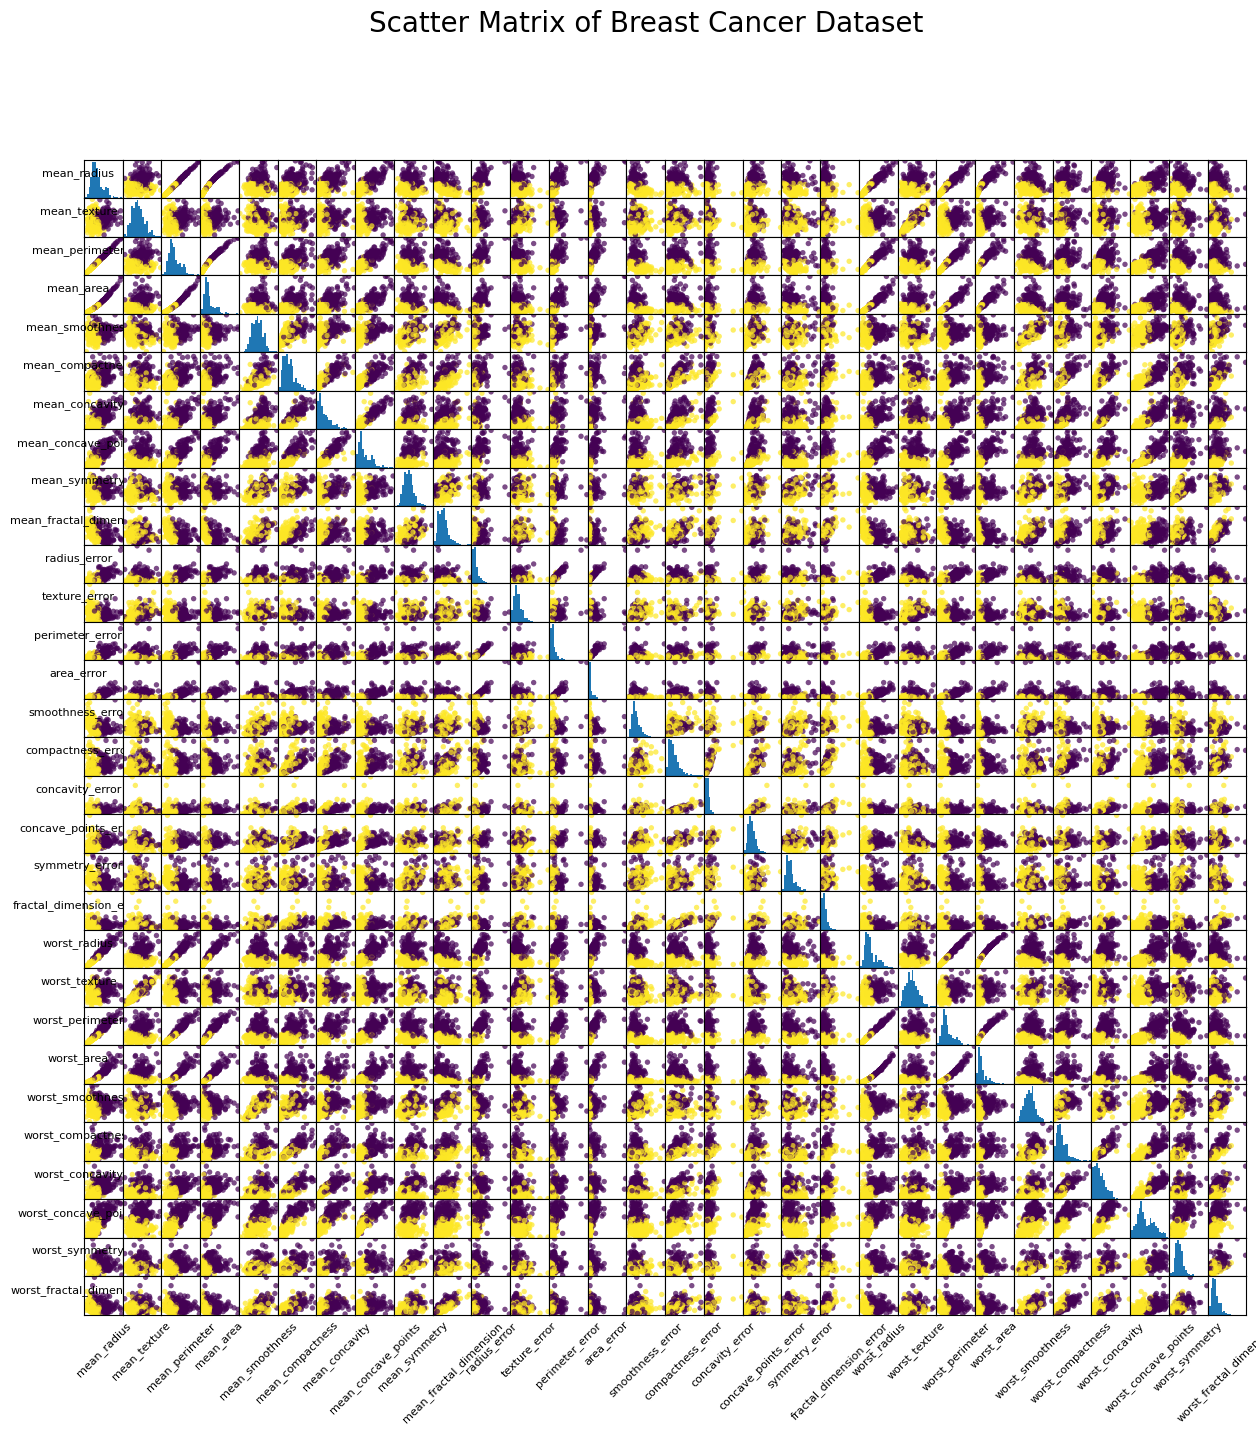

In [86]:
grr = pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=0.7,)
plt.suptitle('Scatter Matrix of Breast Cancer Dataset', fontsize=20)
for ax in grr.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [89]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n {}".format(y_pred))
print("Правильность на тестовом наборе: {:.2f}".format(
    knn.score(X_test, y_test)))
print("Правильность на тестовом наборе в процентах: {:.2f}".format(
    knn.score(X_test, y_test)*100))

Прогнозы для тестового набора: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Правильность на тестовом наборе: 0.92
Правильность на тестовом наборе в процентах: 91.61
